In [ ]:
import pandas as pd

df = pd.read_csv('cost_saving_businesses.csv')
df

,Period,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,...,Electric Savings,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,FY2018,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,...,NaN,QUEENS,40.745706,-73.929565,402.0,26.0,4003160.0,4.002220e+09,17902.0,QN0202
1,FY2018,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,...,NaN,STATEN IS,40.632845,-74.151048,501.0,49.0,5146740.0,5.011610e+09,239.0,SI0107
2,FY2018,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,...,NaN,QUEENS,40.785144,-73.844833,407.0,19.0,4098344.0,4.040850e+09,929.0,QN0701
3,FY2018,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,...,NaN,BROOKLYN,40.673106,-74.002300,306.0,38.0,3336622.0,3.005720e+09,5302.0,BK0601
4,FY2018,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,...,NaN,QUEENS,40.742386,-73.932148,402.0,26.0,4003447.0,4.002520e+09,19901.0,QN0202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,FY2022,Works Manufacturing of Brooklyn NY,Aleksey Kravchuk,aleks@worksmfg.com,7186090027,1155-1205 Manhattan Avenue #3-1-4,Brooklyn,NY,11222,Manufacturing,...,64.74,BROOKLYN,40.738113,-73.955453,301.0,33.0,3404803.0,3.024720e+09,56302.0,BK0101
2359,FY2022,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,...,18589.11,STATEN IS,40.633114,-74.151006,501.0,49.0,5107122.0,5.011610e+09,239.0,SI0107
2360,FY2022,WPC LLC,Sara Samplawska,robertwpcllc@yahoo.com,7184405667,"11-55-1205 Manhattan Avenue, #112",Brooklyn,NY,11222,Manufacturing,...,194.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2361,FY2022,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,...,3651.88,BROOKLYN,40.679518,-73.956819,308.0,35.0,3027572.0,3.011260e+09,305.0,BK0802


# ***How many different companies are represented in the data set?***

In [ ]:
# prompt: using pandas library groupby given df find how many  different companies are represented in the dataset in total
company_count = df.groupby('Company Name').ngroups
company_count

787

# ***What is the total number of jobs created for businesses in Queens?***

In [ ]:
queens_jobs = df[df['Borough'] == 'QUEENS']['Job created'].sum()
queens_jobs

1196.0

# ***How many different unique email domains names are there in the data set?***

In [ ]:
email_domains = df['company email'].str.split('@').str[1]
unique_email_domains = email_domains.nunique()
unique_email_domains

591

# ***Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?***

In [ ]:
grouped_data = df.groupby('Neighborhood Tabulation Area (NTA) (2020)').filter(lambda x: len(x) >= 5)
result = grouped_data.groupby('Neighborhood Tabulation Area (NTA) (2020)') \
    .agg({'Total Savings': 'mean', 'Job created': 'sum'})
result

,Total Savings,Job created
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,10367.961795,16.0
BK0102,12599.753333,15.0
BK0103,19150.922857,0.0
BK0104,21158.253077,187.0
BK0201,15102.036364,0.0
...,...,...
QN1305,166379.352000,0.0
QN1306,21160.505200,0.0
SI0106,6338.252857,10.0


In [ ]:
result.to_csv('NTA_total_info.csv')

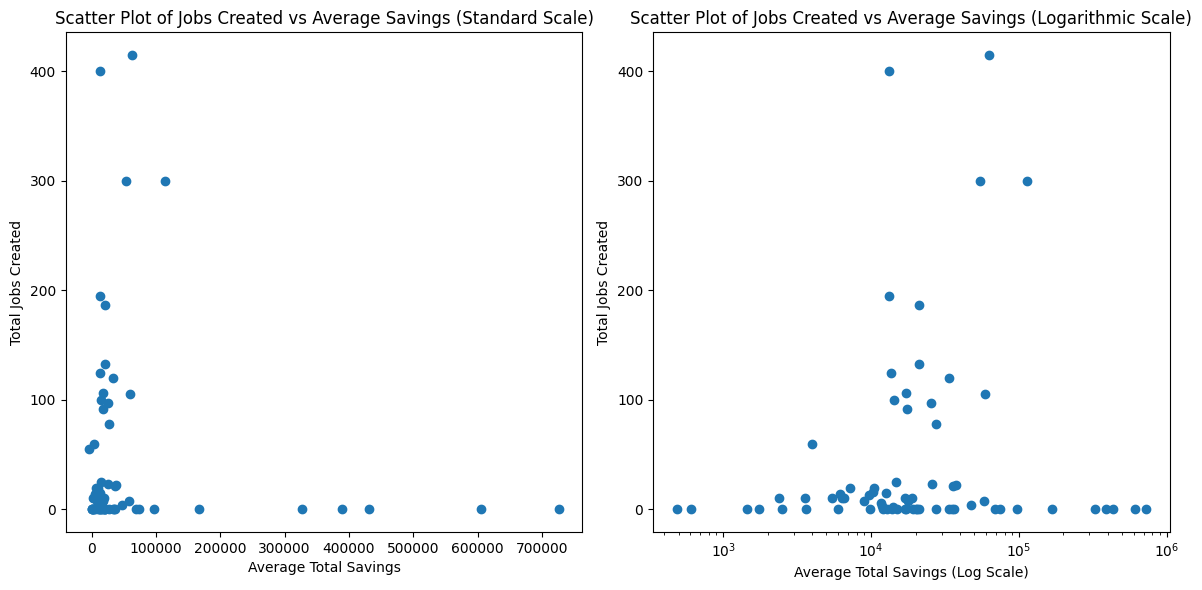

In [ ]:
import matplotlib.pyplot as plt

# Creating scatter plot with standard scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(result['Total Savings'], result['Job created'])
plt.title('Scatter Plot of Jobs Created vs Average Savings (Standard Scale)')
plt.xlabel('Average Total Savings')
plt.ylabel('Total Jobs Created')

# Creating scatter plot with logarithmic scale for savings
plt.subplot(1, 2, 2)
plt.scatter(result['Total Savings'], result['Job created'])
plt.xscale('log')  # Logarithmic scale for x-axis (savings)
plt.title('Scatter Plot of Jobs Created vs Average Savings (Logarithmic Scale)')
plt.xlabel('Average Total Savings (Log Scale)')
plt.ylabel('Total Jobs Created')

plt.tight_layout()
plt.show()

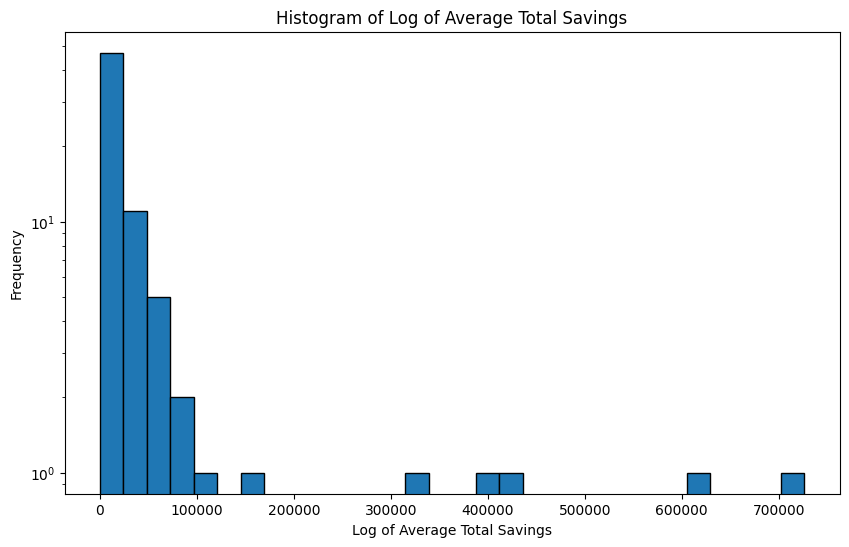

In [ ]:
# Creating a histogram of the log of the average total savings
plt.figure(figsize=(10, 6))
plt.hist(result['Total Savings'].apply(lambda x: max(x, 1)), bins=30, edgecolor='black', log=True)
plt.title('Histogram of Log of Average Total Savings')
plt.xlabel('Log of Average Total Savings')
plt.ylabel('Frequency')
plt.show()

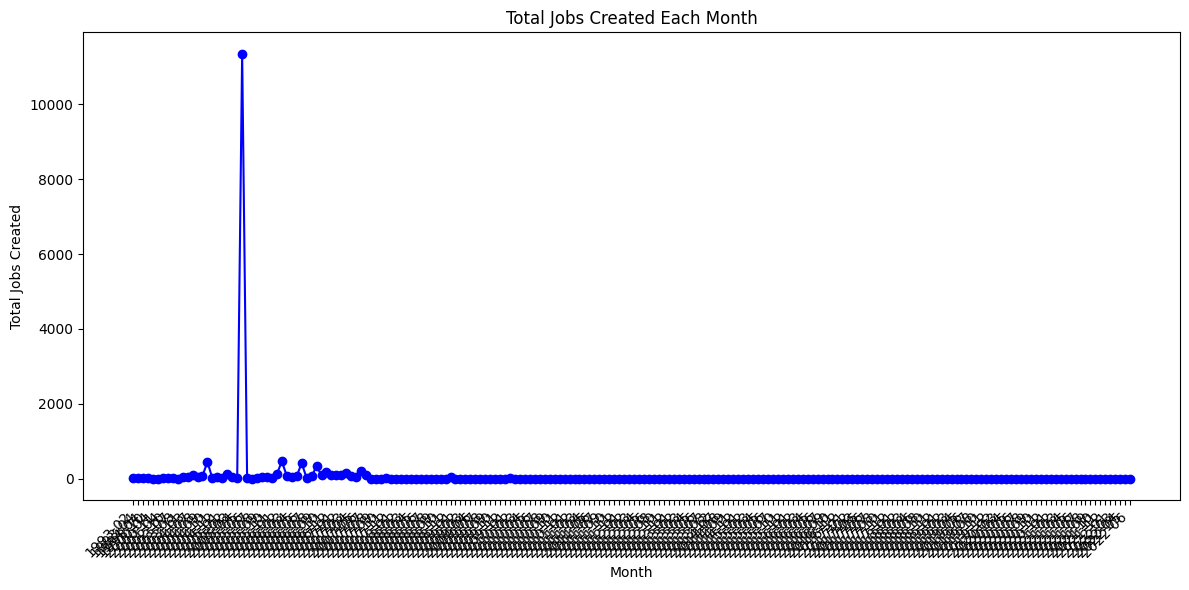

In [ ]:
# Convert 'Effective Date' to datetime format
df['Effective Date'] = pd.to_datetime(df['Effective Date'])

# Extract month and year from 'Effective Date'
df['Month'] = df['Effective Date'].dt.to_period('M')

# Group by month and year, sum total jobs created
monthly_jobs = df.groupby('Month')['Job created'].sum()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_jobs.index.astype(str), monthly_jobs, marker='o', linestyle='-', color='b')
plt.title('Total Jobs Created Each Month')
plt.xlabel('Month')
plt.ylabel('Total Jobs Created')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()